**Fundamentals of Solar Cells and Photovoltaic Systems Engineering**

**Solutions Manual - Chapter 9**

**Problem 9.11**


**This problem represents the first step in the design of a grid-connected PV system installed on the rooftop of a dwelling at a certain location. For this example, we will select Cairo, Egypt (31.233$^{\circ}$N, 30.033$^{\circ}$E).**

**Using pvlib and retrieving the Typical Meteorological Year (TYM), find the optimum inclination for the PV generator that maximizes the reference yield $Y_R$. The PV generator is assumed to be oriented towards the equator.**

We will use the packages [pvlib](https://pvlib-python.readthedocs.io/en/stable/), [pandas](https://pandas.pydata.org/) and [matplotlib.pyplot](https://matplotlib.org/stable/index.html) to plot the results. We will also use the package [pytz](https://pypi.org/project/pytz/) to determine the time zone of Egypt.

In [23]:
import pvlib
import pandas as pd
import matplotlib.pyplot as plt
import pytz

We start by defining the location, date, and time. 

In [24]:
# Cairo, Egypt
lat, lon =  31.233, 30.033

tz = pytz.country_timezones('EG')[0] # timezone corresponding to country 'EG' (Egypt)

# location
location = pvlib.location.Location(lat, lon, tz=tz)

orientation = 180 # pvlib sets orientation origin at North -> South=180

We retrieve typical meteorological year (TMY) data from PVGIS.

In [25]:
tmy, _, _, _ = pvlib.iotools.get_pvgis_tmy(latitude=lat, longitude=lon, map_variables=True)

tmy.index = tmy.index.tz_convert(tz) # use local time

We calculate the Sun's coordinates and calculate the irradiance on the plane of array (POA)

In [26]:
# calculate Sun's coordinates
solar_position = location.get_solarposition(times=tmy.index)

# list of potential tilt angle
tilts=range(0,90,1)

annual_irradiation = pd.Series(index=tilts, dtype=float)

for tilt in tilts: 
    # calculate irradiance at the plane of the array (poa)
    poa_irradiance = pvlib.irradiance.get_total_irradiance(surface_tilt=tilt,
                                                           surface_azimuth=orientation,
                                                           dni=tmy['dni'],
                                                           ghi=tmy['ghi'],
                                                           dhi=tmy['dhi'],
                                                           solar_zenith=solar_position['apparent_zenith'],
                                                           solar_azimuth=solar_position['azimuth'])
    
    #save annual irradiation on the plane of array (POA) in kWh
    annual_irradiation[tilt]=0.001*poa_irradiance['poa_global'].sum() # Wh->kWh


We can plot the annual effective irradiance (reference yield) as a function of the tilt angle.

Text(0.5, 0, 'Tilt angle (degrees)')

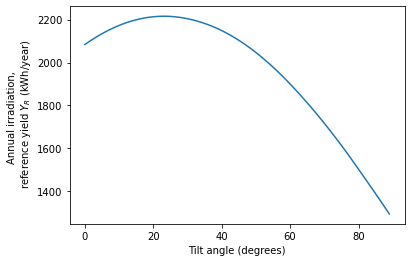

In [27]:
annual_irradiation.plot()
plt.ylabel('Annual irradiation, \n reference yield $Y_R$ (kWh/year)')
plt.xlabel('Tilt angle (degrees)')

The reference yield is maximized for a tilt angle of 23 degrees.

In [28]:
annual_irradiation.idxmax()

23